In [2]:
import pandas
from matplotlib import pyplot

In [3]:
train_data = pandas.read_json('data/train.jsonl', lines = True)

In [4]:
nb_train_items = len(train_data)
print(f'Train data: len = {nb_train_items}')

Train data: len = 8500


In [5]:
train_data.sample(10)

,id,img,label,text
1742,91786,img/91786.png,1,keeping your dishwasher clean will make it las...
3028,16543,img/16543.png,0,when you got somewhere to be but the sheep are...
6648,2576,img/02576.png,0,this is a snakes mouth it all makes fucking se...
981,7312,img/07312.png,0,yeah bitches totalinarism is a sham
5850,42613,img/42613.png,0,"man buns you don't look like a samurai, you lo..."
7481,79024,img/79024.png,1,good morning gamers let's go kill some trannies
3003,49106,img/49106.png,0,my goal for 2019 is to accomplish the goals of...
6661,48125,img/48125.png,1,"damn it john, leave stevie alone"
4153,46215,img/46215.png,0,you think that hoe thinks you're special lol s...
2096,49670,img/49670.png,1,covers his wife from head to toes because sexu...


In [6]:
nb_positives = (train_data.label == 1).sum()
nb_negatives = (train_data.label == 0).sum()
print(f'Positives: {nb_positives}, Negatives: {nb_negatives}, Other labels: {nb_train_items-nb_positives-nb_negatives}')

Positives: 3019, Negatives: 5481, Other labels: 0


In [20]:
print(f'Baseline accuracy (most common class: 0): {nb_negatives / nb_train_items}')

Baseline accuracy (most common class: 0): 0.6448235294117647


In [7]:
train_data['char_len'] = train_data.text.str.len()
train_data['word_len'] = train_data.text.apply(lambda x : len(x.split()))

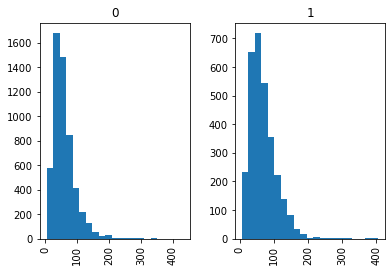

In [8]:
positive_indexes = train_data.label == 1
negative_indexes = train_data.label == 0
train_data.hist(column = 'char_len', by = 'label', bins = 21)
pyplot.show()

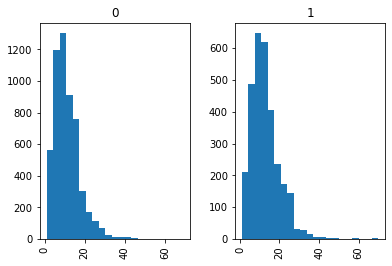

In [9]:
train_data.hist(column = 'word_len', by = 'label', bins = 21)
pyplot.show()

In [10]:
from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')
train_data['sentiment_results'] = train_data.text.apply(sentiment_classifier)

In [11]:
train_data['sentiment_label'] = train_data.sentiment_results.apply(lambda r : r[0]['label'])
train_data['sentiment_score'] = train_data.sentiment_results.apply(lambda r : r[0]['score'])

In [13]:
positive_sentiment_indexes = (train_data.sentiment_label == 'POSITIVE')
negative_sentiment_indexes = (train_data.sentiment_label == 'NEGATIVE')
nb_positive_sent_pos = (positive_indexes & positive_sentiment_indexes).sum()
nb_positive_sent_neg = (positive_indexes & negative_sentiment_indexes).sum()
nb_negative_sent_pos = (negative_indexes & positive_sentiment_indexes).sum()
nb_negative_sent_neg = (negative_indexes & negative_sentiment_indexes).sum()

In [19]:
print('Sentiment analysis:')
print('       POS    NEG')
print(f' 1  {nb_positive_sent_pos:6d} {nb_positive_sent_neg:6d}')
print(f' 0  {nb_negative_sent_pos:6d} {nb_negative_sent_neg:6d}')
print(f'\n Accuracy:{(nb_positive_sent_neg + nb_negative_sent_pos)/nb_train_items}')

Sentiment analysis:
       POS    NEG
 1     763   2256
 0    2006   3475

 Accuracy:0.5014117647058823


In [21]:
train_data.to_csv('eda/eda.csv', columns = ['id', 'sentiment_label', 'sentiment_score'], index = False)